In [74]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


#### Import libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            explained_variance_score,recall_score,f1_score,precision_score,roc_curve,roc_auc_score,\
                            accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split,cross_validate
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier

from plotly.subplots import make_subplots
import plotly.graph_objects as go
#import streamlit as st
import cufflinks as cf
cf.set_config_file(theme='pearl',sharing='public',offline=True)



pd.set_option('display.max_columns', None)
%matplotlib inline

In [76]:
# define the dataset location
# data will be located at root.
accidents = 'accidents_clean.csv'
cas_veh = 'df_merged_cat.csv'
path ='../../'

### Load data

In [77]:
#ORIGINAL
#dfa = pd.read_csv('../../Descargas/Stats19-Data1979-2004/Accidents7904.csv',delimiter=',',encoding='UTF-8-SIG',index_col=0)

In [78]:
# load the accidents_clean_csv file as a dataframe
dfa = pd.read_csv(path + accidents,delimiter=',',encoding='UTF-8-SIG',index_col=0)

In [79]:
# load the casualty_vehicle_csv file as a data frame
dfm = pd.read_csv(path + cas_veh,delimiter=',',encoding='UTF-8-SIG',index_col=0)

In [80]:
#Rename the column which will be used to have a merge.
dfa.rename(columns = {'Accident_Index':'Acc_Index'}, inplace = True)

In [81]:
#Merge the Accidents, casualties and vehicles dataframes cleaned from the last notebook.
dfmerged = pd.merge(dfa,dfm,how='inner',on= 'Acc_Index')

In [82]:
dfmerged.head()

,Acc_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Month,Year,Hour,Daytime,Road_Surface_Conditions_2,Weather_Conditions_2,Light_Conditions_2,Speed_limit_2,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Type,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
0,198901AD00021,Slight,2,1,1989-01-02,Wednesday,A,Dual carriageway,30,January,1989,10,Office hours,Good,Good,Good,30-40,1,6,104,104,1,6,99,1,9
1,198901AD00021,Slight,2,1,1989-01-02,Wednesday,A,Dual carriageway,30,January,1989,10,Office hours,Good,Good,Good,30-40,1,6,104,108,1,8,2495,2,3
2,198901AD00022,Slight,2,1,1989-03-02,Friday,A,Dual carriageway,30,March,1989,11,Office hours,Good,Good,Good,30-40,1,6,104,104,1,6,249,1,7
3,198901AD00022,Slight,2,1,1989-03-02,Friday,A,Dual carriageway,30,March,1989,11,Office hours,Good,Good,Good,30-40,1,6,104,113,1,8,3858,2,8
4,198901AD00026,Slight,2,1,1989-08-02,Wednesday,A,Single carriageway,30,August,1989,17,Commuting to home,Good,Good,Good,30-40,1,6,104,104,1,6,392,1,10


In [83]:
#Drop useless columns
dfmerged.drop(columns=['Acc_Index', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date',
       'Road_Type','Month', 'Year', 'Hour','Speed_limit_2', 'Sex_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Type','Propulsion_Code','1st_Road_Class'],inplace=True)

In [84]:
#delete old dataframes in order to have more RAM space for the next steps.
del dfa,dfm

## **Feature engineering**

In [85]:
## Processing numerical and categorical features.

In [86]:
num_cols = ['Age_of_Vehicle', 'Engine_Capacity_(CC)']
cat_cols = ['Day_of_Week', 'Speed_limit', 'Daytime',
       'Road_Surface_Conditions_2', 'Weather_Conditions_2',
       'Light_Conditions_2', 'Vehicle_Type', 'Sex_of_Driver',
       'Age_Band_of_Driver']

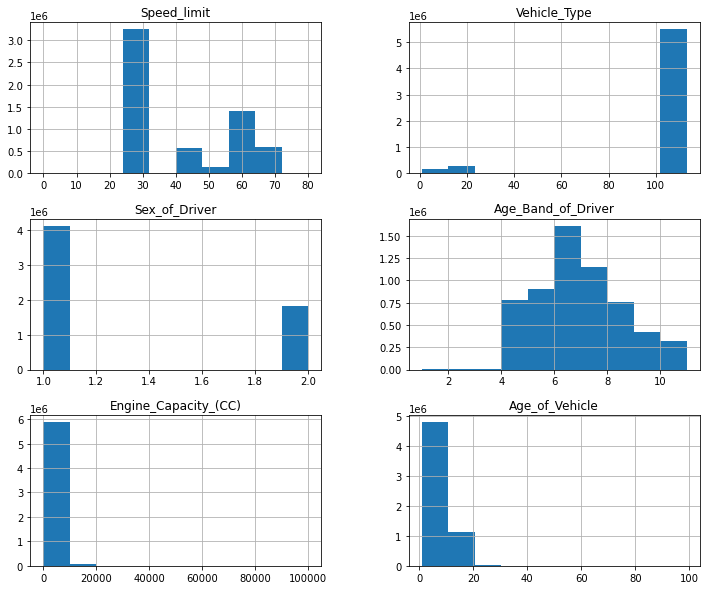

In [87]:
dfmerged.hist(figsize=(12,10));
#the two numerical variables doesn't have a normal distribution.
# We can also use a log tranform to check if the columns follow like a normal distribution

In [88]:
dfmerged['Age_of_Vehicle'] = dfmerged['Age_of_Vehicle'].replace(0,0.1)
dfmerged['Engine_Capacity_(CC)'] = dfmerged['Engine_Capacity_(CC)'].replace(0,0.1)
dfmerged['Age_of_Vehicle'] = dfmerged['Age_of_Vehicle'].apply(lambda x: np.log10(x))
dfmerged['Engine_Capacity_(CC)'] = dfmerged['Engine_Capacity_(CC)'].apply(lambda x: np.log10(x))

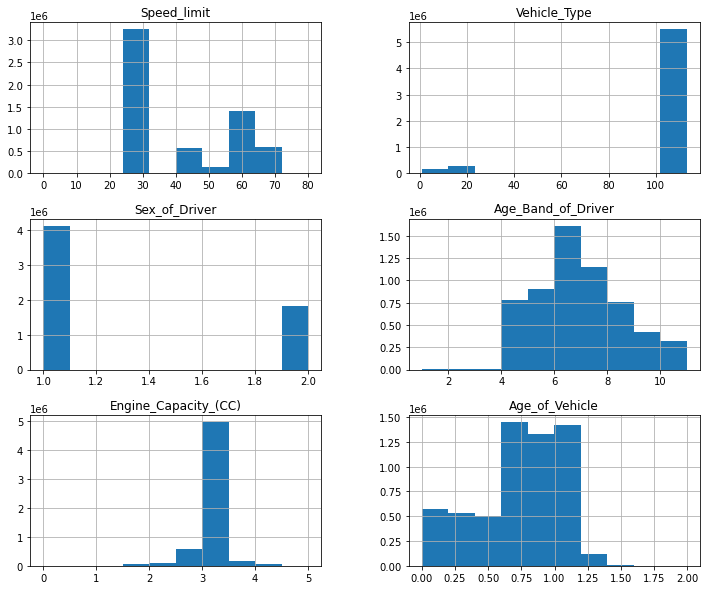

In [89]:
dfmerged.hist(figsize=(12,10));

In [90]:
# We can see that the distribution of Engine capacity and age of vehicle improves a little.

<AxesSubplot:xlabel='Engine_Capacity_(CC)'>

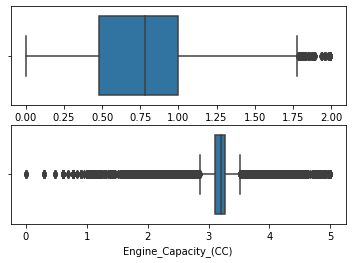

In [91]:
# plotting boxplots
fig,ax = plt.subplots(2,1)
sns.boxplot(data=dfmerged, x='Age_of_Vehicle',ax=ax[0])
sns.boxplot(data=dfmerged, x='Engine_Capacity_(CC)',ax=ax[1])


In [92]:
dfmerged['Engine_Capacity_(CC)'].value_counts(normalize=True)

3.203577    5.430957e-02
3.203305    4.347487e-02
3.300595    3.511852e-02
3.254306    3.066383e-02
2.999131    2.608384e-02
                ...     
3.587599    1.684002e-07
3.788168    1.684002e-07
4.618884    1.684002e-07
4.875061    1.684002e-07
4.397905    1.684002e-07
Name: Engine_Capacity_(CC), Length: 4081, dtype: float64

In [93]:
#check for NaN and missing values
print('NaN',dfmerged.isna().sum()/len(dfmerged))
np.abs(dfmerged[dfmerged == -1].sum())/len(dfmerged)

NaN Accident_Severity            0.0
Day_of_Week                  0.0
Speed_limit                  0.0
Daytime                      0.0
Road_Surface_Conditions_2    0.0
Weather_Conditions_2         0.0
Light_Conditions_2           0.0
Vehicle_Type                 0.0
Sex_of_Driver                0.0
Age_Band_of_Driver           0.0
Engine_Capacity_(CC)         0.0
Age_of_Vehicle               0.0
dtype: float64


Accident_Severity            0.0
Day_of_Week                  0.0
Speed_limit                  0.0
Daytime                      0.0
Road_Surface_Conditions_2    0.0
Weather_Conditions_2         0.0
Light_Conditions_2           0.0
Vehicle_Type                 0.0
Sex_of_Driver                0.0
Age_Band_of_Driver           0.0
Engine_Capacity_(CC)         0.0
Age_of_Vehicle               0.0
dtype: object

In [94]:
#change the variable types for categorial and numerical variables
for col in cat_cols:
    dfmerged[col] = dfmerged[col].astype('str')
    
for col in num_cols:
    dfmerged[col] = dfmerged[col].astype('int')

In [95]:
# Converting the target variable into numeric categories
dfmerged['Accident_Severity'].replace({'Slight': 1, 'Serious': 2, 'Fatal': 3}, inplace=True)
dfmerged['Accident_Severity'] = dfmerged['Accident_Severity'].astype('int64')

In [96]:
#Labelencoder

In [97]:
lenc = LabelEncoder()
dfmerged[cat_cols] = dfmerged[cat_cols].apply(lenc.fit_transform)
dfmerged['Accident_Severity'] = lenc.fit_transform(dfmerged['Accident_Severity'])

In [98]:
#This function calculates the Variance inflation factor and operates to drop the columns which VIF is greater than 5. Then it drops the variables with high collinearity

# URL: https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-pandas-columns-in-python

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [99]:
X = dfmerged.drop('Accident_Severity', axis=1)
y = dfmerged['Accident_Severity']

In [100]:
#Drop the columns with high collinerarity
X=calculate_vif(X)
#split before train our model
#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y)

dropping 'Engine_Capacity_(CC)' at index: 9
dropping 'Vehicle_Type' at index: 6
dropping 'Age_Band_of_Driver' at index: 7
dropping 'Weather_Conditions_2' at index: 4
Remaining variables:
Index(['Day_of_Week', 'Speed_limit', 'Daytime', 'Road_Surface_Conditions_2',
       'Light_Conditions_2', 'Sex_of_Driver', 'Age_of_Vehicle'],
      dtype='object')


In [101]:
X.dtypes

Day_of_Week                  int32
Speed_limit                  int32
Daytime                      int32
Road_Surface_Conditions_2    int32
Light_Conditions_2           int32
Sex_of_Driver                int32
Age_of_Vehicle               int32
dtype: object

In [102]:
cat = ['Day_of_Week','Daytime', 'Speed_limit','Road_Surface_Conditions_2',
       'Light_Conditions_2', 'Sex_of_Driver']

num  = ['Age_of_Vehicle']

In [103]:
#This functions allow us to make predictions using different models.


def evaluate_model(X,y,num,cat,select_model):
#selection model

    if select_model == 1:
        model = LogisticRegression()
    elif select_model == 2:
        model = DecisionTreeClassifier()
    elif select_model == 3:
        model = RandomForestClassifier()
    elif select_model == 4:
        model = BaggingClassifier()
        
        
    numeric_features = num
    categorical_features = cat
    #Handling categorical and numerical data with Pipelines
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
    
    categorical_transformer = LabelEncoder()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    categorical_transformer  = StandardScaler()
    preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
 
    ])

    # Append to classifier the preprocessing pipeline.
    # Now we have a full prediction pipeline.
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    #Before split in train/test, we drop the columns that have high collinearity calling the funciton calculate_vif
#    X=calculate_vif(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y)
    

    clf.fit(X_train, y_train)
    print("model score: %.3f" % clf.score(X_test, y_test))
    yhat = clf.predict(X_test)
                   
#    accuracy = accuracy_score(y_test, yhat)
#    recall = recall_score(y_test, yhat,average=None)
#    f1score =  f1_score(y_test, yhat,average=None)
#    precision = precision_score(y_test, yhat,average=None)
                   
    #print(classification_report(y_test, yhat))
    
    eval_score(X_train, X_test, y_train, y_test, clf,yhat)
       
    return (yhat)

In [ ]:
#evaluating Logistic Regresion model

model score: 0.790


C:\Users\hexen\anaconda3\envs\tfm\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hexen\anaconda3\envs\tfm\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hexen\anaconda3\envs\tfm\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.79      1.00      0.88   1172696
           1       0.00      0.00      0.00    270377
           2       0.00      0.00      0.00     41486

    accuracy                           0.79   1484559
   macro avg       0.26      0.33      0.29   1484559
weighted avg       0.62      0.79      0.70   1484559



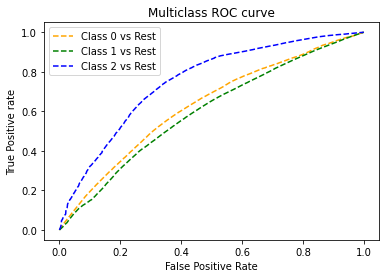

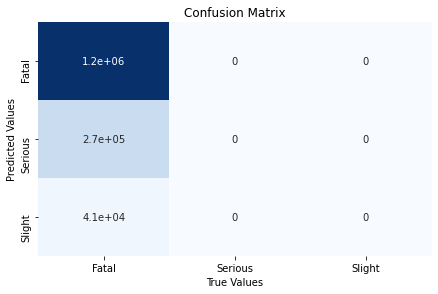

In [106]:
yhat = evaluate_model(X,y,num,cat,1)

In [107]:
def eval_score(X_train, X_test, y_train, y_test, classifier,yhat):
    classifier.fit(X_train, y_train)
#    preds = classifier.predict(X_test)
    probs = classifier.predict_proba(X_test)
    
    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3
    
    print(classification_report(y_test, yhat))
    
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probs[:,i], pos_label=i)
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC',dpi=300);
    
    #plotting matrix confusion
    matrix = confusion_matrix(y_test, yhat)
    dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                            columns=['Fatal', 'Serious', 'Slight'])
    # create heatmap
    fig,ax = plt.subplots()
    ax = sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
    ax = plt.title('Confusion Matrix')
    ax = plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
    plt.show()




    return roc_auc_score(y_test, probs,multi_class='ovo', average='weighted')

Remaining variables:
Index(['Day_of_Week', 'Speed_limit', 'Daytime', 'Road_Surface_Conditions_2',
       'Light_Conditions_2', 'Sex_of_Driver', 'Age_of_Vehicle'],
      dtype='object')
model score: 0.790
              precision    recall  f1-score   support

           0       0.79      1.00      0.88   1172696
           1       0.57      0.00      0.00    270377
           2       0.65      0.02      0.04     41486

    accuracy                           0.79   1484559
   macro avg       0.67      0.34      0.31   1484559
weighted avg       0.75      0.79      0.70   1484559



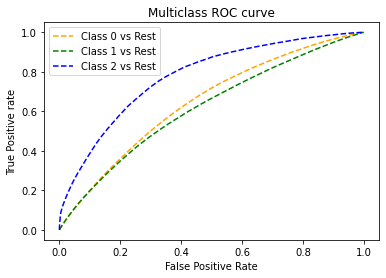

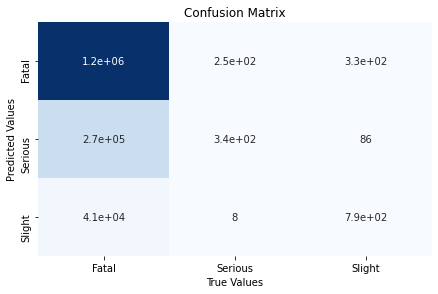

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
#Evaluating decisiontreeclassifier
evaluate_model(X,y,num,cat,2)

In [ ]:
#Evaluating randomforest classifier

In [62]:
evaluate_model(X,y,num,cat,3)

Remaining variables:
Index(['Day_of_Week', 'Speed_limit', 'Daytime', 'Road_Surface_Conditions_2',
       'Light_Conditions_2', 'Sex_of_Driver', 'Age_of_Vehicle'],
      dtype='object')
model score: 0.790
              precision    recall  f1-score   support

           0       0.79      1.00      0.88   1172696
           1       0.49      0.00      0.00    270377
           2       0.63      0.02      0.04     41486

    accuracy                           0.79   1484559
   macro avg       0.64      0.34      0.31   1484559
weighted avg       0.73      0.79      0.70   1484559



KeyboardInterrupt: 

In [117]:
    
    #THE LEARN CURVE TRAIN/TEST ERROR, OVERFIT UNDERFIT
lc = learning_curve(X,y)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Good Fit Model")
plt.ylabel("Misclassification Rate/Loss");

TypeError: learning_curve() missing 1 required positional argument: 'y'

In [118]:
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

NameError: name 'plot_learning_curves' is not defined

In [ ]:
n_rows=int(2e6)
#Creating matrix of dependent and independent variable

# independent variables representing with X

X=dfmerged.iloc[:n_rows,1:].values

Y=dfmerged.iloc[:n_rows,[0]].values.reshape(-1,1)

#########################################################

#Taking of missing data with help of SimpleImputer class

#from sklearn.impute import SimpleImputer as si

#imputer=si(missing_values=np.NaN, strategy="mean")

#imputer=imputer.fit(X[:,1:3])

#X[:,1:3]=imputer.transform(X[:,1:3])

############################################ 

#Encoding the Categorical data from dataset

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X=LabelEncoder()


X[:,3]=labelencoder_X.fit_transform(X[:,3])

onehotencoder=OneHotEncoder(handle_unknown='ignore')

X=onehotencoder.fit_transform(X)


labelencoder_Y=LabelEncoder()

Y=labelencoder_Y.fit_transform(Y)

###################################

#Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
##################################

#Feature scaling

from sklearn.preprocessing import StandardScaler

scale_X=StandardScaler(with_mean=False)

X_train=scale_X.fit_transform(X_train)

X_test=scale_X.transform(X_test)

#Train our model
##################################
model = LogisticRegression(solver='lbfgs',max_iter=1000)
# fit on the training set
model.fit(X_train, y_train.reshape(-1,))
# predict on test set
yhat = model.predict(X_test)
yhat = yhat
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat,average='weighted')
f1score =  f1_score(y_test, yhat,average='weighted')
precision = precision_score(y_test, yhat,average='weighted')
print('Accuracy: %.2f' % (accuracy*100))
print('Recall:',recall)
print('f1 score:',f1score)
print('Precision:',precision)
target_names = 'Accident_Severity'

print(classification_report(y_test, yhat))

eval_features(X_train, X_test, y_train, y_test, model)

In [1]:
from collections import Counter
#to understand the distribution of train and test labels.
Counter(y_train),Counter(y_test)

NameError: name 'y_train' is not defined

In [ ]:
#CONFUSION MATRIX
matrix = confusion_matrix(y_test, yhat)

dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()